In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import csv 
from matplotlib import pyplot as plt 
from sklearn.datasets import make_blobs 
from sklearn.mixture import GaussianMixture

In [2]:
data = pd.read_csv('/content/2020_em_clustering.csv')

In [3]:
data.head() 

,0.06685872501993229,-0.6604233740791752,2.069703239929657,1.530678007667195,1.112939894012916,0.1458996114340977,2.365293148688218,0.04882983970664212,0.1264952337733675,0.9120944053939763,4.021951754934347,4.118717276143826,3.304709348372986,3.250364228887389,4.854982462551962,4.554417055631245,3.791465898014367,4.309007337891146,1.42974168926228,2.85606479096107,1.419771821157689,0.0880959578096624,1.358815911794687,-0.7862085420144196,3.335572899266917,1.090813050128261,-0.003325038611340148,0.6440233739587122,0.9412419679824826,0.09916190750478238,5.055732817570938,3.436192701684293,3.319949341987982,4.631599656641248,5.416412625966052,4.26061193666316,4.925906154863055,3.954387360357774,3.920112665633261,3.48041757374058


In [4]:
data.shape

(0, 40)

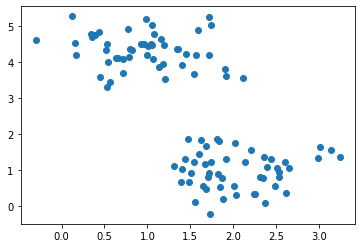

In [5]:
data, y = make_blobs (centers = 2, cluster_std = 0.50, random_state=0)
plt.scatter(data[:,0], data[:,1])

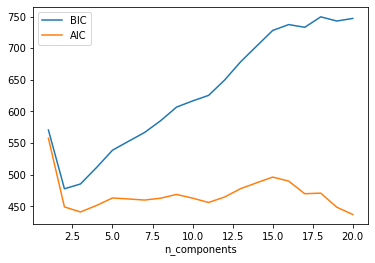

In [6]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(data) for n in n_components] 
plt.plot(n_components, [m.bic(data) for m in models], label='BIC') 
plt.plot(n_components, [m.aic(data) for m in models], label='AIC') 
plt.legend (loc = 'best') 
plt.xlabel('n_components');


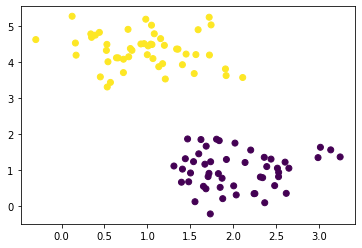

In [7]:
gmm = GaussianMixture(n_components=2)
gmm.fit(data)

labels = gmm.predict(data) 
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis');

EM Algorithm and K-means are similar as that they allow model refining of an iterative process to find the best congestion. However, the K-means algorithm differs in the method used for calculating the Euclidean distance while calculating the distance between each of two data items; and EM uses statistical methods.
Unlike K-means, in EM, the clusters are not limited to spherical shapes. In EM we can constrain the algorithm to provide different covariance matrices (spherical, diagonal and generic). These different covariance matrices in return allow us to control the shape of our clusters and hence we can detect sub-populations in our data with different characteristics.
